In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve

from sklearn.ensemble import RandomForestClassifier

   Unnamed: 0  int_corr     age_o    attr_o  ...  imprelig  goal  date  go_out.1
0           0  0.557471  0.243243  0.571429  ...       4.0   2.0   7.0       1.0
1           1  0.787356  0.108108  0.666667  ...       4.0   2.0   7.0       1.0
2           2  0.568966  0.108108  0.952381  ...       4.0   2.0   7.0       1.0
3           3  0.827586  0.135135  0.666667  ...       4.0   2.0   7.0       1.0
4           4  0.597701  0.162162  0.761905  ...       4.0   2.0   7.0       1.0

[5 rows x 51 columns]
Counter({0: 6596, 1: 1338})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 6596, 1: 6596})


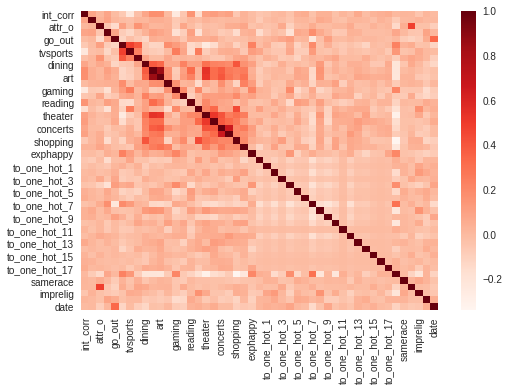

In [28]:
data = pd.read_csv("/content/drive/MyDrive/Master/Anul 1/Semestrul 1/Exploratory Data Analysis/Proiect/processed_data.csv", error_bad_lines=False)
print(data.head(5))

Y = data['match']
X = data[['int_corr', 'age_o', 'attr_o', 'age', 'go_out', 'sports',
 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming',
 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music',
 'shopping', 'yoga', 'exphappy', 'to_one_hot_0', 'to_one_hot_1', 'to_one_hot_2',
 'to_one_hot_3', 'to_one_hot_4', 'to_one_hot_5', 'to_one_hot_6',
 'to_one_hot_7', 'to_one_hot_8', 'to_one_hot_9', 'to_one_hot_10',
 'to_one_hot_11', 'to_one_hot_12', 'to_one_hot_13', 'to_one_hot_14',
 'to_one_hot_15', 'to_one_hot_16', 'to_one_hot_17', 'gender',
 'samerace', 'dec_o', 'imprelig','goal', 'date']]

counter = Counter(Y)
print(counter)

oversample = BorderlineSMOTE()
X, Y = oversample.fit_resample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle = True, random_state = 42)

counter = Counter(Y)
print(counter)

data.drop('match', inplace=True, axis=1)
data.drop('Unnamed: 0', inplace=True, axis=1)
data.drop('field_cd', inplace=True, axis=1)
data.drop('go_out.1', inplace=True, axis=1)

cor = data.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

In [14]:
parameters = {
            'n_estimators': [trees for trees in range(1250, 1300, 10)],
            'max_depth': [depth for depth in range(15, 20, 1)],

        }

model = RandomForestClassifier(random_state=42)

clf = GridSearchCV(
    model, parameters, scoring = "f1", verbose = 10, n_jobs = -1, cv = 5
)

clf.fit(X_train, Y_train)

print("Best parameters: \n")
print(clf.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 25.3min finished


Best parameters: 

{'max_depth': 19, 'n_estimators': 1260}


In [29]:
randomForest = RandomForestClassifier(            
            bootstrap=True, class_weight=None,
            criterion='gini', max_depth=19, max_features='auto',
            max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1200,
            n_jobs=None, oob_score=False, random_state=42, verbose=0,
            warm_start=False)

randomForest.fit(X_train, Y_train)

Y_pred=randomForest.predict(X_test)

print("Accuracy:",accuracy_score(Y_test, Y_pred))
print('\n')
print(classification_report(Y_test, Y_pred))

Accuracy: 0.9178878221323901


              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1971
           1       0.89      0.96      0.92      1987

    accuracy                           0.92      3958
   macro avg       0.92      0.92      0.92      3958
weighted avg       0.92      0.92      0.92      3958



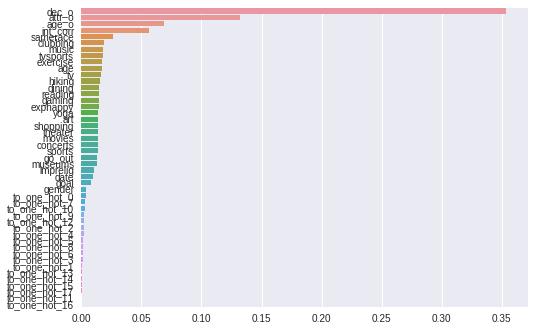

In [30]:
features = pd.Series(randomForest.feature_importances_, index = data.columns.values).sort_values(ascending=False)

sns.barplot(x=features, y=features.index)

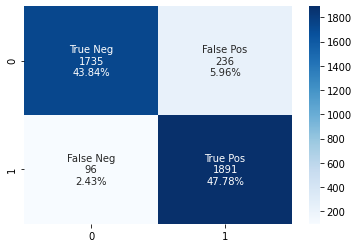

In [20]:
cm = confusion_matrix(Y_test, Y_pred)  

groups = ['True Neg','False Pos','False Neg','True Pos']
counter = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{g}\n{c}\n{p}" for g, c, p in
          zip(groups ,counter,percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

Text(0, 0.5, 'True Positive rate')

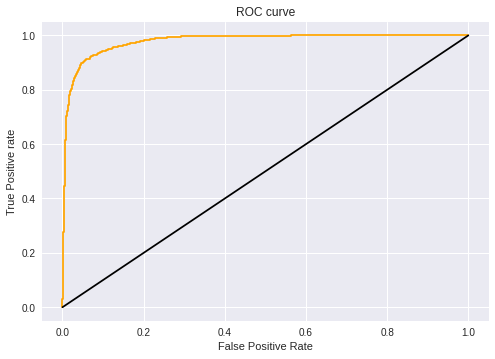

In [21]:
predict_prob = randomForest.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(Y_test, predict_prob, pos_label=1)

random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

plt.style.use('seaborn')
plt.plot(fpr, tpr, color='orange')
plt.plot(p_fpr, p_tpr, color='black')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

   Unnamed: 0  int_corr     age_o    attr_o  ...  imprelig  goal  date  go_out.1
0           0  0.557471  0.243243  0.571429  ...       4.0   2.0   7.0       1.0
1           1  0.787356  0.108108  0.666667  ...       4.0   2.0   7.0       1.0
2           2  0.568966  0.108108  0.952381  ...       4.0   2.0   7.0       1.0
3           3  0.827586  0.135135  0.666667  ...       4.0   2.0   7.0       1.0
4           4  0.597701  0.162162  0.761905  ...       4.0   2.0   7.0       1.0

[5 rows x 51 columns]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


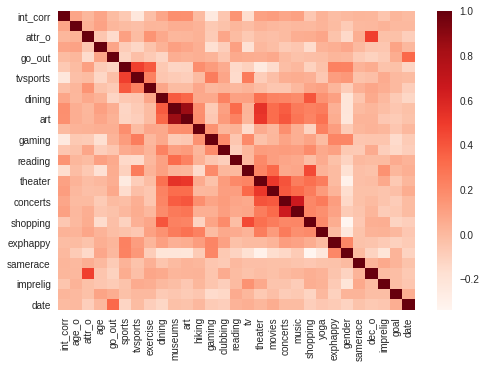

In [22]:
data = pd.read_csv("/content/drive/MyDrive/Master/Anul 1/Semestrul 1/Exploratory Data Analysis/Proiect/processed_data.csv", error_bad_lines=False)
print(data.head(5))

Y = data['match']
X = data[['int_corr', 'age_o', 'attr_o', 'age', 'go_out', 'sports',
 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming',
 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music',
 'shopping', 'yoga', 'exphappy', 'gender',
 'samerace', 'dec_o', 'imprelig','goal', 'date']]

oversample = BorderlineSMOTE()
X, Y = oversample.fit_resample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle = True, random_state = 42)

data.drop('match', inplace=True, axis=1)
data.drop('Unnamed: 0', inplace=True, axis=1)
data.drop('field_cd', inplace=True, axis=1)
data.drop('go_out.1', inplace=True, axis=1)
data.drop('to_one_hot_0', inplace=True, axis=1)
data.drop('to_one_hot_1', inplace=True, axis=1)
data.drop('to_one_hot_2', inplace=True, axis=1)
data.drop('to_one_hot_3', inplace=True, axis=1)
data.drop('to_one_hot_4', inplace=True, axis=1)
data.drop('to_one_hot_5', inplace=True, axis=1)
data.drop('to_one_hot_6', inplace=True, axis=1)
data.drop('to_one_hot_7', inplace=True, axis=1)
data.drop('to_one_hot_8', inplace=True, axis=1)
data.drop('to_one_hot_9', inplace=True, axis=1)
data.drop('to_one_hot_10', inplace=True, axis=1)
data.drop('to_one_hot_11', inplace=True, axis=1)
data.drop('to_one_hot_12', inplace=True, axis=1)
data.drop('to_one_hot_13', inplace=True, axis=1)
data.drop('to_one_hot_14', inplace=True, axis=1)
data.drop('to_one_hot_15', inplace=True, axis=1)
data.drop('to_one_hot_16', inplace=True, axis=1)
data.drop('to_one_hot_17', inplace=True, axis=1)


cor = data.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

In [38]:
parameters = {
            'n_estimators': [trees for trees in range(500, 1301, 100)],
            'max_depth': [depth for depth in range(10, 101, 10)],
        }

model = RandomForestClassifier(random_state=42)

clf = GridSearchCV(
    model, parameters, scoring = "f1", verbose = 10, n_jobs = -1, cv = 5
)

clf.fit(X_train, Y_train)

print("Best parameters: \n")
print(clf.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 20

Best parameters: 

{'max_depth': 30, 'n_estimators': 1200}


In [23]:
randomForest = RandomForestClassifier(            
            bootstrap=True, class_weight=None,
            criterion='gini', max_depth=30, max_features='auto',
            max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1300,
            n_jobs=None, oob_score=False, random_state=42, verbose=0,
            warm_start=False)

randomForest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [24]:
Y_pred=randomForest.predict(X_test)

print("Accuracy:",accuracy_score(Y_test, Y_pred))
print('\n')
print(classification_report(Y_test, Y_pred))

Accuracy: 0.9173825164224356


              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1971
           1       0.89      0.95      0.92      1987

    accuracy                           0.92      3958
   macro avg       0.92      0.92      0.92      3958
weighted avg       0.92      0.92      0.92      3958



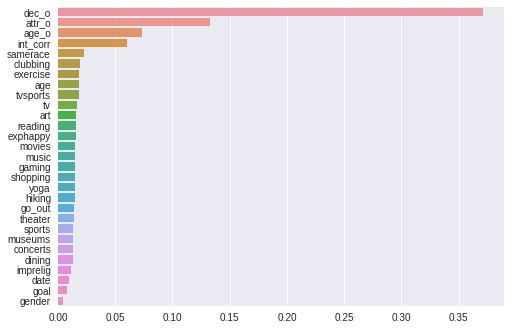

In [25]:
features = pd.Series(randomForest.feature_importances_, index = data.columns.values).sort_values(ascending=False)

sns.barplot(x=features, y=features.index)

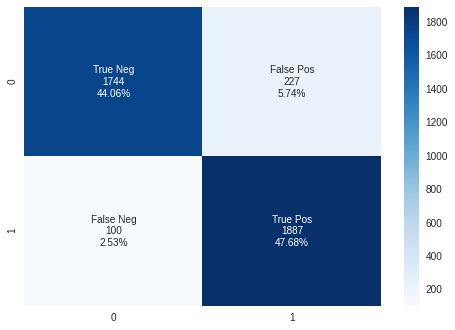

In [26]:
cm = confusion_matrix(Y_test, Y_pred)  

groups = ['True Neg','False Pos','False Neg','True Pos']
counter = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{g}\n{c}\n{p}" for g, c, p in
          zip(groups ,counter,percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

Text(0, 0.5, 'True Positive rate')

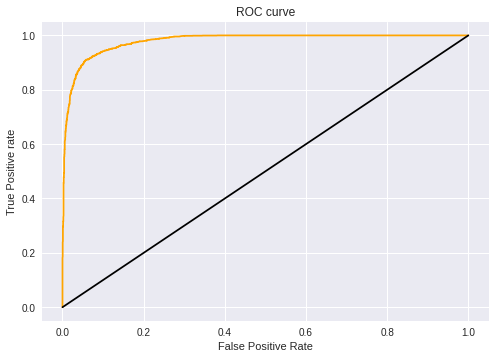

In [27]:
predict_prob = randomForest.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(Y_test, predict_prob, pos_label=1)

random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

plt.style.use('seaborn')
plt.plot(fpr, tpr, color='orange')
plt.plot(p_fpr, p_tpr, color='black')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')